# Vector database
Using a ML model (Transformer), we can encode a document into a vector. These vectors are stored in a vector database. The vector database allows fast and efficient for semantics search of the document. We can search for documents using a search query, which is mapped to the same vector space as the documents. Using a distance metric like the dot product, we can return the documents near the query vector. <br>
In this notebook I demonstrate a vector database using a few Wikipedia articles.

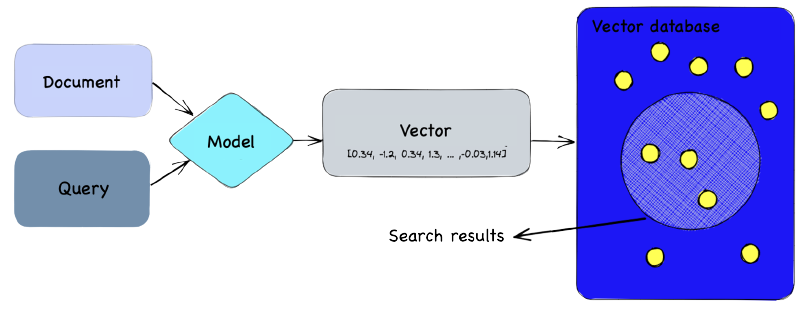

### Imports

In [ ]:
#Download some packages not present in Google Colab
!pip install sentence_transformers
!pip install wikipedia

In [ ]:
from sentence_transformers import SentenceTransformer, util
import wikipedia as wiki
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

## Wikipedia
Demonstration of vector database using wikipedia pages

In [ ]:
subjects = ["Large water management projects",
            "Bankruptcy due to fraud",
            "Financial institutions"]

nr_pages = 10

In [ ]:
# Find Wikipedia pages
wikipedia_pages = {}

for subject in subjects:
    print(f"Subject: {subject}")
    wikipedia_pages[subject] = []
    pages = wiki.search(subject, results=nr_pages*2)

    idx = 0
    while len(wikipedia_pages[subject]) < nr_pages:
        try:
            page = wiki.page(pages[idx])
        except:
            pass
        else:
            wikipedia_pages[subject].append(page.content)
            print(f"{len(wikipedia_pages[subject])}: {pages[idx]}")
        idx+=1
    print()

Subject: Large water management projects
1: Rainwater management
2: Construction management
3: Irrigation management
4: Kaveri River water dispute
5: Water transportation
6: Resource management
7: Water resources management in Egypt
8: Flood control in the Netherlands
9: Water demand management
10: Indian rivers interlinking project

Subject: Bankruptcy due to fraud
1: Bankruptcy in the United States
2: Bankruptcy
3: MCI Inc.
4: Bankruptcy of Lehman Brothers
5: Carrian Group
6: Bankruptcy of FTX
7: Nirav Modi
8: Bank fraud
9: Ghost cattle fraud
10: Bankruptcy discharge

Subject: Financial institutions
1: Financial institution
2: International financial institutions
3: Non-bank financial institution
4: 2007–2008 financial crisis
5: All India Financial Institutions
6: Monetary Financial Institutions
7: Systemically important financial institution
8: Routing number (Canada)
9: Financial services
10: List of financial institutions in Ghana



In [ ]:
# Load pre-trained model aimed at asymmetric semantic search.
model = SentenceTransformer('msmarco-distilbert-base-tas-b')

# Build vector database
vector_database = {}

for subject, pages in wikipedia_pages.items():
    page_vectors = model.encode(pages, convert_to_tensor=True)
    vector_database[subject] = page_vectors.cpu()
    print(f"Added vectors for {subject}")

Added vectors for Large water management projects
Added vectors for Bankruptcy due to fraud
Added vectors for Financial institutions


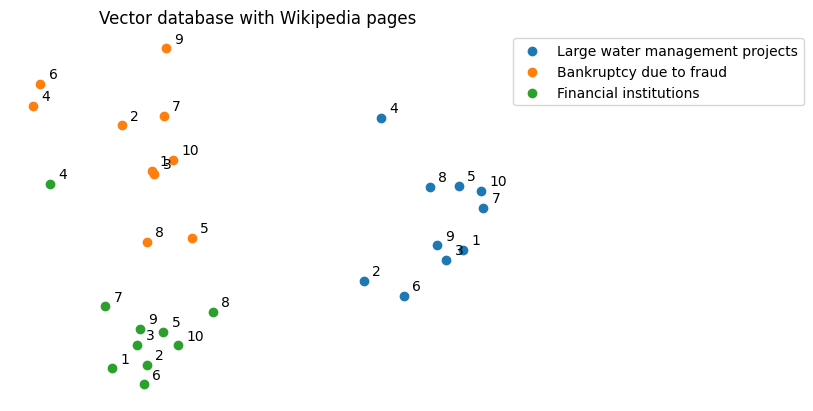

In [ ]:
# Fit PCA
pca = PCA(n_components=2)
pca.fit(np.concatenate([vectors for vectors in vector_database.values()]))

# Plot PCA for all pages
for subject, vectors in vector_database.items():
    pca_vectors = pca.transform(vectors)
    plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], label=subject)

    for i, (x, y) in enumerate(pca_vectors):
        plt.annotate(str(i+1), (x, y), textcoords="offset points", xytext=(6, 4))

plt.title("Vector database with Wikipedia pages")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.axis('off')
plt.show()

In [ ]:
# Query to find relevant wikipedia pages
#query = ["Food items"]
#query = ["Civil infrastructure"]
query = ["Central bank"]

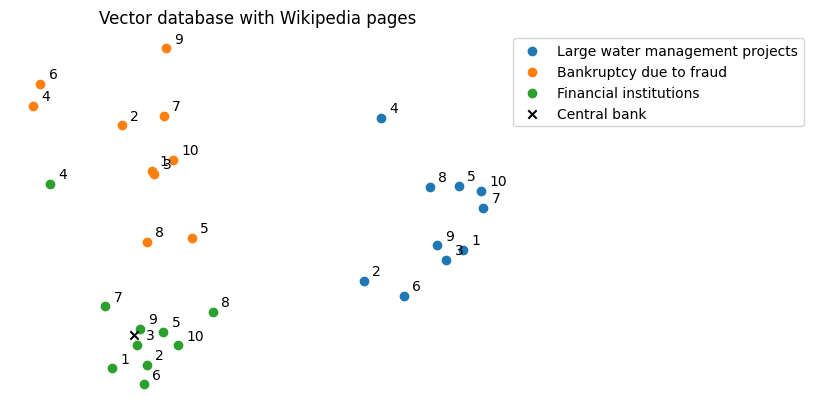

In [ ]:
query_vector = model.encode(query, convert_to_tensor=True).cpu()
pca_query_vector = pca.transform(query_vector)

# Plot PCA for all pages
for subject, vectors in vector_database.items():
    pca_vectors = pca.transform(vectors)
    plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], label=subject)

    for i, (x, y) in enumerate(pca_vectors):
        plt.annotate(str(i+1), (x, y), textcoords="offset points", xytext=(6, 4))
# Add query vector to the plot
plt.scatter(pca_query_vector[:, 0], pca_query_vector[:, 1], label=query[0], color="black", marker='x')

plt.title("Vector database with Wikipedia pages")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.axis('off')
plt.show()